# Linear Regression 구현 해보기

In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(777)

### 가상 데이터셋

In [39]:
W_true = 3.0
B_true = 2.0

X = tf.random.normal((500,1))
noise = tf.random.normal((500,1))

y = X * W_true + B_true + noise

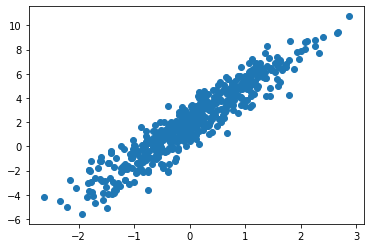

In [40]:
plt.scatter(X,y)
plt.show()

-----------------

In [41]:
# 학습을 진행할 미분
w = tf.Variable(5.)
b = tf.Variable(0.)

In [42]:
print(w)
print(b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


In [43]:
lr = 0.03       # learning rate

In [44]:
# 학습 과정을 기록하는 친구가 필요하다.
w_records = []
b_records = []
loss_records = []

for epoch in range(100):
    # 매 epoch마다 한번씩 학습을 할 것
    with tf.GradientTape() as tape:
        y_hat = X * w + b
        loss = tf.reduce_mean(tf.square(y - y_hat))
                # reduce_mean : 설정한 축의 평균
                # square : 제곱
    
    w_records.append(w.numpy())
    b_records.append(b.numpy())
    
    loss_records.append(loss.numpy())
    
    dw, db = tape.gradient(loss, [w,b])

    w.assign_sub(lr * dw)     # assign_sub : 기존값에 - 취하기
    b.assign_sub(lr * db)

In [45]:
# X[0] * w + b
# y[0]

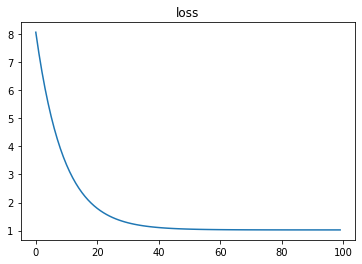

In [46]:
# 전체 다시 실행해야함. // loss_records
plt.plot(loss_records)
plt.title('loss')
plt.show()

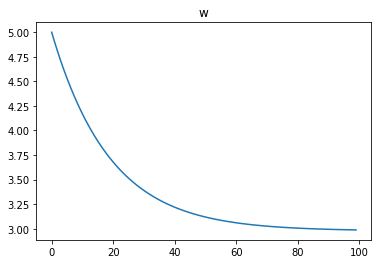

In [47]:
# w_records
plt.plot(w_records)
plt.title('w')
plt.show()

# 처음엔 5로 시작했지만, 나중에 3으로 수렴하는 것을 보니 학습이 잘 되고 있어 보인다.

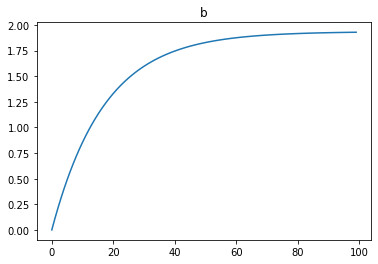

In [48]:
# b_records
plt.plot(b_records)
plt.title('b')
plt.show()

# 0 으로 이니셜라이징 했는데, 2로 수렴하고 있다.
# 이 학습 로직이 정확하다는 것을 알 수 있다.

### Dataset 당뇨병 진행도 예측 하기 -> linear regression 활용

In [49]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names, dtype=np.float32)
df['const'] = np.ones(df.shape[0])
df.tail(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,const
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,1.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,1.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,1.0


#### 먼저!

$X$ 를 Feature, ,$w$를 가중치 벡터, $y$를 Target이라고 할 때, 

$X^T X$의 역행령이 존재 한다고 가정했을 때,  

아래의 식을 이용해 $w$의 추정치 $w^*$를 구해봅시다. 

$$
w^{\ast} = (X^TX)^{-1} X^T y
$$


-----

In [50]:
diabetes.target     # sklearn.datasets - load_diabetes().target 데이터임.

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [51]:
diabetes.target.shape

(442,)

In [52]:
X = df
y = np.expand_dims(diabetes.target, axis=1)     # 1 차원(?)을 더함

In [53]:
X.shape, y.shape

((442, 11), (442, 1))

In [54]:
XT = tf.transpose(X)

w = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)        # w의 추정치 식

In [55]:
y_pred = tf.matmul(X, w)
y_pred

<tf.Tensor: shape=(442, 1), dtype=float64, numpy=
array([[206.11667747],
       [ 68.07103311],
       [176.8827902 ],
       [166.91445692],
       [128.4622584 ],
       [106.3519149 ],
       [ 73.89134423],
       [118.8542283 ],
       [158.80889671],
       [213.58462208],
       [ 97.07481353],
       [ 95.10108416],
       [115.06915913],
       [164.67656979],
       [103.07814212],
       [177.17487928],
       [211.75709334],
       [182.84134847],
       [148.00326751],
       [124.01754101],
       [120.33362136],
       [ 85.80068976],
       [113.11345744],
       [252.45225922],
       [165.48779213],
       [147.71997587],
       [ 97.12871477],
       [179.09358229],
       [129.05345735],
       [184.78113935],
       [158.71516855],
       [ 69.47575835],
       [261.50385385],
       [112.82234669],
       [ 78.37318193],
       [ 87.66360874],
       [207.92114621],
       [157.87642015],
       [240.84708263],
       [136.93257462],
       [153.48044629],
       

In [56]:
y       # diabetes.target, axis = 1

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

In [57]:
print('예측한 진행도 : ', y_pred[0].numpy(), '실제 진행도 : ', y[0])
print('예측한 진행도 : ', y_pred[19].numpy(), '실제 진행도 : ', y[19])
print('예측한 진행도 : ', y_pred[31].numpy(), '실제 진행도 : ', y[31])

# 전반적으로 잘 안맞는다.

예측한 진행도 :  [206.11667747] 실제 진행도 :  [151.]
예측한 진행도 :  [124.01754101] 실제 진행도 :  [168.]
예측한 진행도 :  [69.47575835] 실제 진행도 :  [59.]


### 이번에는, SGD 방식으로 구현해보세요!!

- Conditions
    - steepest gradient descents(전체 데이터 사용)
    - 가중치는 Gaussian normal distribution에서의 난수로 초기화함. 
    - step size  == 0.03
    - 100 iteration

In [58]:
lr = 0.03
num_iter = 100

-----

In [59]:
w_init = tf.random.normal((X.shape[-1], 1))      # X 피쳐개수
w = tf.Variable(w_init)
w

<tf.Variable 'Variable:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.35265976],
       [-0.25515324],
       [-1.1368378 ],
       [-0.7476295 ],
       [-0.9641192 ],
       [-0.26755205],
       [ 1.2396927 ],
       [-1.0720978 ],
       [-0.96597004],
       [-1.9027146 ],
       [-0.29748687]], dtype=float32)>

In [60]:
for i in range(num_iter):       # epoch 횟수만큼 돌게 된다.
    with tf.GradientTape() as tape:
        y_hat = tf.matmul(X, w)
        loss = tf.reduce_mean((y - y_hat) ** 2)

    dw = tape.gradient(loss, w)
    w.assign_sub(lr * dw)

InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:MatMul]

> - 데이터 타입이 안맞는다고 함

-----------------

In [61]:
X.dtypes        # X의 데이터 타입들을 확인한다 // const의 피쳐가 float64 임을 알 수 있다.

age      float32
sex      float32
bmi      float32
bp       float32
s1       float32
s2       float32
s3       float32
s4       float32
s5       float32
s6       float32
const    float64
dtype: object

In [62]:
w_init = tf.random.normal((X.shape[-1], 1), dtype=tf.float64)      # X 피쳐개수전체(-1), 1차원으로(?)
                                            # dtype은 tf.float64 로 받기로 한다.
w = tf.Variable(w_init)     # w_init 은 Tensor이기 때문에, Variable을 한다(?)
print(type(w_init));print(type(w))
w

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


<tf.Variable 'Variable:0' shape=(11, 1) dtype=float64, numpy=
array([[ 1.49328994],
       [-1.15646121],
       [ 0.9250001 ],
       [-1.17711151],
       [-1.1418846 ],
       [ 1.74679938],
       [-1.00508151],
       [-0.69102771],
       [ 0.21022666],
       [-0.90758984],
       [-0.46827373]])>

In [63]:
for i in range(num_iter):       # epoch 횟수만큼 돌게 된다.
    with tf.GradientTape() as tape:
        y_hat = tf.matmul(X, w)
        loss = tf.reduce_mean((y - y_hat) ** 2)

    dw = tape.gradient(loss, w)
    w.assign_sub(lr * dw)

In [64]:
print('예측한 진행도 : ', y_hat[0].numpy(), '실제 진행도 : ', y[0])
print('예측한 진행도 : ', y_hat[19].numpy(), '실제 진행도 : ', y[19])
print('예측한 진행도 : ', y_hat[31].numpy(), '실제 진행도 : ', y[31])

예측한 진행도 :  [153.17233721] 실제 진행도 :  [151.]
예측한 진행도 :  [149.83131673] 실제 진행도 :  [168.]
예측한 진행도 :  [147.75589177] 실제 진행도 :  [59.]
